In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
color_dict = {'PM.3': (0.847, 0.106, 0.376, 1.0),
 'PM.4': (0.902, 0.318, 0.0, 1.0),
 'PM.2': (1.0, 0.549, 0.0, 1.0),
 'T+C.29': (1.0, 0.718, 0.302, 1.0),
 'PM.1': (0.082, 0.396, 0.753, 1.0),
 'PM.5': (0.18, 0.49, 0.196, 1.0),
 'PM.0': (0.941, 0.384, 0.573, 1.0),
 'T.12': (0.259, 0.647, 0.961, 1.0),
 'T.11': (0.4, 0.733, 0.416, 1.0),
 'G.20': (0.89, 0.106, 0.137, 1.0),
 'T.8': (0.6, 0.196, 0.8, 1.0),
 'G.23': (1.0, 0.843, 0.0, 1.0),
 'PM.7': (0.251, 0.878, 0.816, 1.0),
 'G.18': (0.647, 0.165, 0.165, 1.0),
 'PM.6': (0.0, 0.5, 0.5, 1.0),
 'T.9': (1.0, 0.0, 1.0, 1.0)}

In [3]:
sns.set_theme(style="white", context="talk")


In [7]:
data

,Unnamed: 0,pathway,pval,padj,log2err,ES,NES,size,score
0,5,PM.0,1.628122e-02,2.604995e-02,0.153554,-0.541383,-1.609947,29,-1.788313
1,3,PM.1,1.003102e-03,2.674938e-03,0.455060,0.548965,1.802528,40,2.998655
2,4,PM.2,1.794701e-03,3.589403e-03,0.455060,0.698919,1.868357,17,2.746008
3,1,PM.3,1.510905e-08,1.208724e-07,0.733762,0.755006,2.426332,36,7.820763
4,6,PM.4,2.851148e-01,3.801531e-01,0.037479,0.331522,1.104861,43,0.544980
5,8,PM.5,7.564855e-01,7.564855e-01,0.017690,-0.303036,-0.795948,17,-0.121199
6,2,PM.6,1.229559e-04,4.918238e-04,0.518848,0.630879,1.984912,33,3.910250
7,7,PM.7,3.428149e-01,3.917885e-01,0.030226,-0.351153,-1.073643,33,-0.464940


In [38]:
dictionary = {'L2': 'Layer 2', 
              'L3': 'Layer 3',
              'L4': 'Layer 4',
              'L4_L5': 'Layers 4/5',
              'L5_6': 'Layers 5/6'}

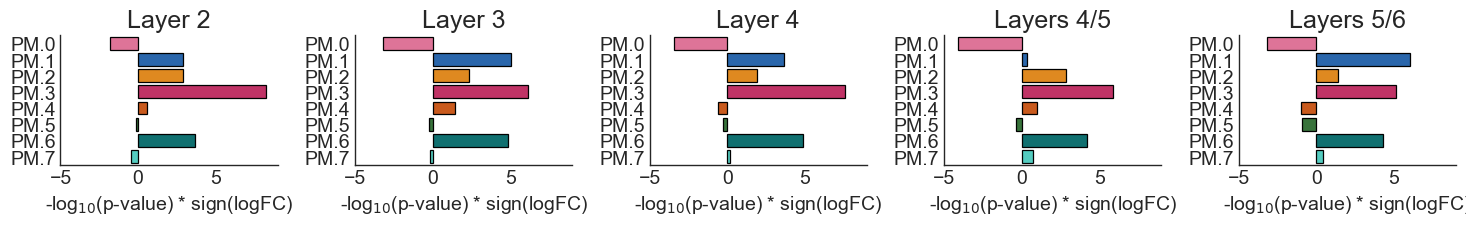

<Figure size 640x480 with 0 Axes>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your list of layer identifiers
layers = ['L2', 'L3', 'L4', 'L4_L5', 'L5_6']

# Create a 4x4 grid of subplots and flatten the array of axes
fig, axs = plt.subplots(1, 5, figsize=(15, 2.6))
axs = axs.flatten()  # now axs is a 1D array

# Loop over each layer, load the data, and plot on a separate axis
for j, i in enumerate(layers):
    data = pd.read_csv(f'../../processed_data/fgsea_ex_layer_{i}.csv')
    data = data.sort_values(by='pathway')
    data.reset_index(drop=True, inplace=True)
    
    # Plot the barplot on the j-th axis
    sns.barplot(y='pathway', x='score', data=data, hue='pathway', 
                palette=color_dict, dodge=False, ax=axs[j])
    
    # Remove the legend if you don't need multiple ones
    if axs[j].get_legend() is not None:
        axs[j].get_legend().remove()
    
    # Adjust the spines and labels
    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
    axs[j].set_xlabel('-log$_{10}$(p-value) * sign(logFC)', fontsize=14)
    axs[j].set_ylabel('', fontsize=14)
    axs[j].tick_params(axis='both', which='both', direction='in', length=5, labelsize=14)
    axs[j].spines['bottom'].set_linewidth(1)
    axs[j].spines['left'].set_linewidth(1)
    axs[j].spines['top'].set_linewidth(0)
    axs[j].spines['right'].set_linewidth(0)
    axs[j].set_xlim(-5,9)

    # if j>0:  
    #     axs[j].set_ylabel('')
    #     #axs[j].set_yticks([])
    #     axs[j].set_yticklabels([])
    # Outline each bar
    for patch in axs[j].patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.9)
    
    # Set title from a dictionary if you have one
    axs[j].set_title(dictionary[i])

# Remove any unused subplots (if there are more axes than layers)
for k in range(len(layers), len(axs)):
    fig.delaxes(axs[k])

plt.tight_layout()
plt.show()

plt.savefig('../../paper/extended_plots/fgsea_by_ex_layer.png', bbox_inches='tight')
